In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Parameters
IMG_SIZE = 224  # MobileNet requires input images to be at least 224x224
BATCH_SIZE = 32
NUM_CLASSES = 5  # Change this to the number of classes in your dataset

In [3]:

# Load the MobileNet model with pre-trained weights
base_model = MobileNet(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,  # Exclude the top layer
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [4]:


# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensions
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(NUM_CLASSES, activation='softmax')(x)  # Final classification layer


In [5]:

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

In [6]:

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:


# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split dataset into training and validation sets
)

In [8]:


train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\msuki\\lang_chain_depl\\dataset\\archive (1) (1)\\colored_images',  # Replace with your dataset directory
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 2927 images belonging to 5 classes.


In [9]:

validation_generator = train_datagen.flow_from_directory(
    'C:\\Users\\msuki\\lang_chain_depl\\dataset\\archive (1) (1)\\colored_images',  # Replace with your dataset directory
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 729 images belonging to 5 classes.


In [11]:
from tensorflow.keras.metrics import Precision, Recall
import tensorflow.keras.backend as K

# Instantiate metrics outside the function
precision_metric = Precision()
recall_metric = Recall()

# Custom F1-score metric
def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', precision_metric, recall_metric, f1_score]
)

# Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
EPOCHS = 100
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)


Epoch 1/100


c:\Users\msuki\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.5878 - f1_score: 0.5192 - loss: 1.3798 - precision_3: 0.6514 - recall_2: 0.5405 - val_accuracy: 0.7301 - val_f1_score: 0.7049 - val_loss: 0.7097 - val_precision_3: 0.8527 - val_recall_2: 0.5838 - learning_rate: 0.0010
Epoch 2/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 1:23 925ms/step - accuracy: 0.7188 - f1_score: 0.6667 - loss: 0.8066 - precision_3: 0.7143 - recall_2: 0.6250

c:\Users\msuki\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7188 - f1_score: 0.3370 - loss: 0.8066 - precision_3: 0.7143 - recall_2: 0.6250 - val_accuracy: 0.6800 - val_f1_score: 0.3571 - val_loss: 0.6755 - val_precision_3: 0.8824 - val_recall_2: 0.6000 - learning_rate: 0.0010
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7056 - f1_score: 0.6819 - loss: 0.8117 - precision_3: 0.7786 - recall_2: 0.6131 - val_accuracy: 0.7656 - val_f1_score: 0.7333 - val_loss: 0.6608 - val_precision_3: 0.8696 - val_recall_2: 0.6349 - learning_rate: 0.0010
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6562 - f1_score: 0.2996 - loss: 1.0759 - precision_3: 0.7273 - recall_2: 0.5000 - val_accuracy: 0.5200 - val_f1_score: 0.2381 - val_loss: 1.0151 - val_precision_3: 0.5882 - val_recall_2: 0.4000 - learning_rate: 0.0010
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.7126 - f1_score: 0.7053 - loss: 0.7462 - precision_3: 0.7863 - recall_2: 0.6361 - val_accuracy:

In [12]:
# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    restore_best_weights=True 
)

history_fine_tune = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping],  
    verbose=1
)



Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.7402 - loss: 0.6506 - val_accuracy: 0.7741 - val_loss: 0.5944
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7500 - loss: 0.6225 - val_accuracy: 0.7600 - val_loss: 0.6800
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.7528 - loss: 0.6532 - val_accuracy: 0.7855 - val_loss: 0.6029
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8438 - loss: 0.4779 - val_accuracy: 0.8800 - val_loss: 0.4297
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.7707 - loss: 0.6214 - val_accuracy: 0.7869 - val_loss: 0.6058
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8125 - loss: 0.5088 - val_accuracy: 0.7600 - val_loss: 0.5404
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.7641 - loss: 0.6234 - val_accuracy: 0.7827 - val_loss: 0.5980
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6562 - loss: 0.7703 - val_accuracy: 0.8000

In [15]:
# Save the trained model
model.save('retinopathy_mobilenet_model.h5')

# Evaluate the model on a test set (if available)
test_generator = train_datagen.flow_from_directory(
    'C:\\Users\\msuki\\lang_chain_depl\\dataset\\archive (1) (1)\\colored_images',  # Replace with your test dataset directory
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 3656 images belonging to 5 classes.


In [16]:

loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

115/115 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7818 - loss: 0.5761
Test Loss: 0.5772714018821716, Test Accuracy: 0.7918490171432495


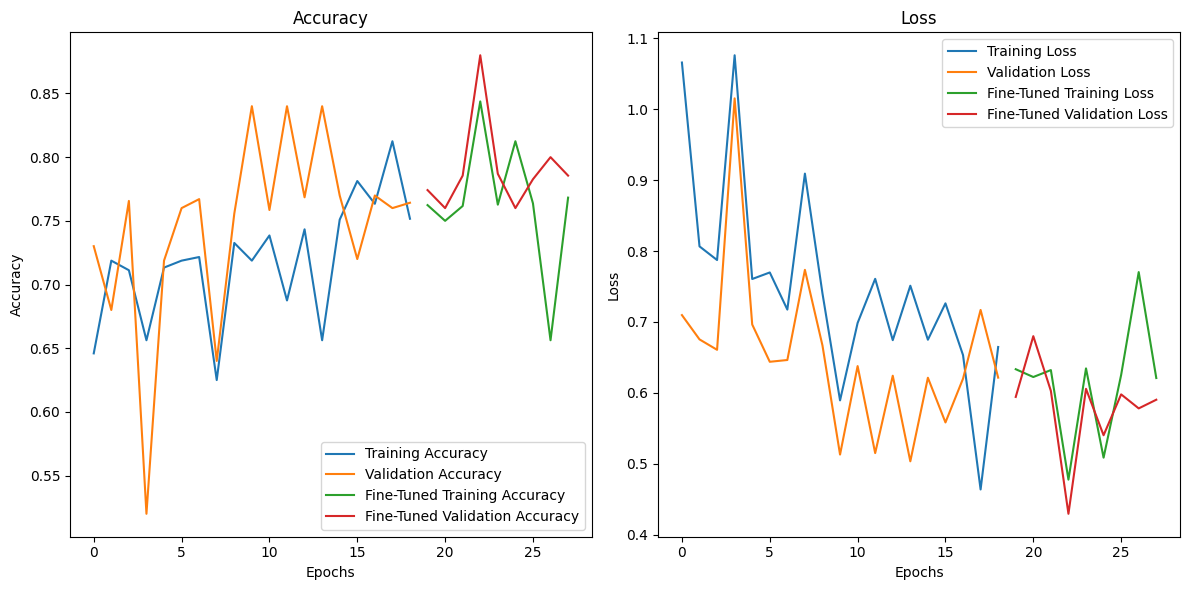

In [17]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
if 'accuracy' in history_fine_tune.history:
    plt.plot(range(len(history.history['accuracy']), 
                   len(history.history['accuracy']) + len(history_fine_tune.history['accuracy'])),
             history_fine_tune.history['accuracy'], label='Fine-Tuned Training Accuracy')
    plt.plot(range(len(history.history['val_accuracy']), 
                   len(history.history['val_accuracy']) + len(history_fine_tune.history['val_accuracy'])),
             history_fine_tune.history['val_accuracy'], label='Fine-Tuned Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
if 'loss' in history_fine_tune.history:
    plt.plot(range(len(history.history['loss']), 
                   len(history.history['loss']) + len(history_fine_tune.history['loss'])),
             history_fine_tune.history['loss'], label='Fine-Tuned Training Loss')
    plt.plot(range(len(history.history['val_loss']), 
                   len(history.history['val_loss']) + len(history_fine_tune.history['val_loss'])),
             history_fine_tune.history['val_loss'], label='Fine-Tuned Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class labels (replace with your actual class names)
class_labels = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'severe']  # Update based on your dataset

def predict_image(image_path, model, class_labels):
    """
    Predict the class of an image using a trained model.
    :param image_path: Path to the image to be predicted.
    :param model: Trained model for prediction.
    :param class_labels: List of class labels.
    :return: Predicted class label.
    """
    # Load and preprocess the image
    img = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Resize the image to match model input
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    predicted_class = class_labels[predicted_class_idx]

    # Return the predicted class
    return predicted_class, predictions[0]

# Test the prediction function
image_path = r'C:\Users\msuki\lang_chain_depl\dataset\archive (1) (1)\colored_images\No_DR\2b4c7b5f1f1e.png'  # Replace with the path to your image
predicted_class, prediction_probs = predict_image(image_path, model, class_labels)

print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {prediction_probs}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
Predicted Class: No_DR
Prediction Probabilities: [0.02640826 0.02595792 0.93537307 0.00972536 0.0025354 ]
